In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fl

In [3]:
df = pd.read_csv('./laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


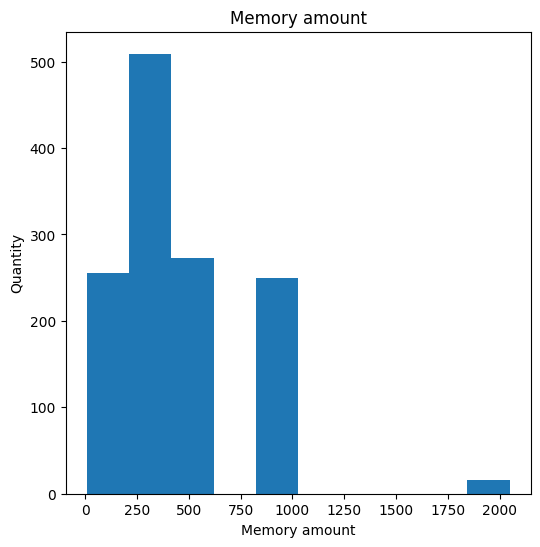

In [14]:
plt.figure(figsize=(6,6))
plt.hist(df['Memory_Amount'])
plt.xlabel('Memory amount')
plt.ylabel('Quantity')
plt.title('Memory amount');

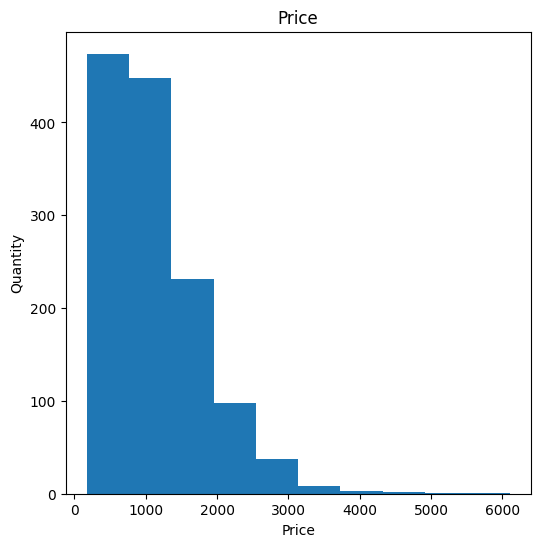

In [15]:
plt.figure(figsize=(6,6))
plt.hist(df['Price_euros'])
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price');